In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thesis.functions.LSMC import average_lsmc, compute_mean_absolute_error
from thesis.analytical_dec_bdd import solve_decision_boundary


# LSMC under GBM
## Global constants and regression setup

In [2]:
S_0 = 100       # Initial stock price
r = 0.06        # Stock price risk-neutral mean
sigma = 0.2     # Stock price volatility

T = 1       # Maturity
K = 110     # Strike price

reg_degree = 4
reg_poly = "laguerre"

constants = [S_0, r, sigma]
model = 'gbm'

## Find the analytical solution for the decision boundary

In [ ]:
analytical_decision_boundary = solve_decision_boundary(K, r, sigma, T, n=1000)
np.save("../results/GBM/analytical_decision_boundary_n=1000.npy", analytical_decision_boundary)

## Vary the number of time steps N

### Generate and save the results

In [ ]:
L = 100     # Number of simulations
M = 10000   # Number of sample paths

results_N = []

for N in [10, 50, 50, 500]:
    dt = T/N
    time_grid = np.linspace(dt, T, N)

    # Compute the price and the decision boundary using the average_lsmc function
    ave_price_gbm, ave_decision_boundary_gbm = average_lsmc(L, model, constants, K, M, N, dt, reg_degree, reg_poly)
    
    # Compute the MAE of the decision boundary approximation vs. the analytical solution
    L1_loss = compute_mean_absolute_error(analytical_decision_boundary, ave_decision_boundary_gbm)

    # Save the obtained decision boundary approximation to npy file
    np.save(f"../results/GBM/decision_boundary_N={N}.npy", ave_decision_boundary_gbm)

    # Store the price and MAE results
    results_N.append(f"The average price of this American Put option under GBM with {N} time steps is {ave_price_gbm}")
    results_N.append(f"The Mean Absolute Error for {N} time steps is {L1_loss}")

# Save the price and MAE results to txt file
with open(f"../results/GBM/outputs_vary_N.txt", "w") as f:
    for line in results_N:
        f.write(line + "\n")

### Plot the decision boundary results

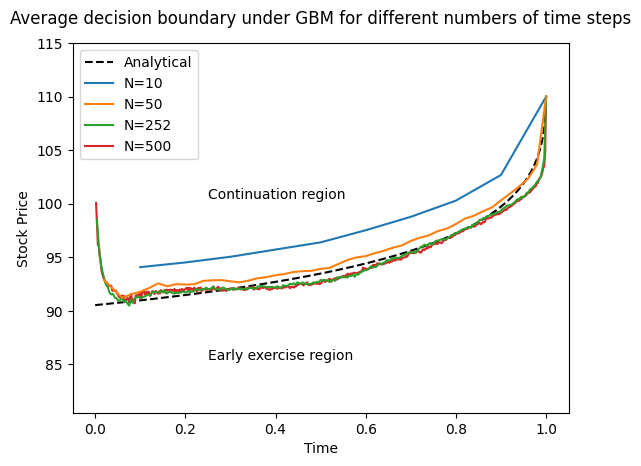

In [10]:
# Load the calculated decision boundary approximations
dec_bdd_N_10 = np.load("../results/GBM/decision_boundary_N=10.npy")
dec_bdd_N_50 = np.load("../results/GBM/decision_boundary_N=50.npy")
dec_bdd_N_252 = np.load("../results/GBM/decision_boundary_N=252.npy")
dec_bdd_N_500 = np.load("../results/GBM/decision_boundary_N=500.npy")

# Plot the analytical decision boundary and save its handle
analytical_line, = plt.plot(np.linspace(0, T, 1001), analytical_decision_boundary, color='black', linestyle='--',label='Analytical')

# Plot the approximated decision boundaries in the desired order
line1, = plt.plot(np.linspace(1/10, T, 10), dec_bdd_N_10, label='N=10', c='#1f77b4')
line2, = plt.plot(np.linspace(1/500, T, 500), dec_bdd_N_500, label='N=500', c='#d62728')
line3, = plt.plot(np.linspace(1/252, T, 252), dec_bdd_N_252, label='N=252', c='#2ca02c')
line4, = plt.plot(np.linspace(1/50, T, 50), dec_bdd_N_50, label='N=50', c='#ff7f0e')

# Collect handles and labels with corresponding N values
lines_labels = [
    (10, line1, 'N=10'),
    (500, line2, 'N=500'),
    (252, line3, 'N=252'),
    (50, line4, 'N=50'),
]
# Sort legend entries by N
lines_labels.sort(key=lambda x: x[0])
sorted_lines = [item[1] for item in lines_labels]
sorted_labels = [item[2] for item in lines_labels]
# Insert Analytical at the top of the legend
sorted_lines.insert(0, analytical_line)
sorted_labels.insert(0, 'Analytical')

# Find min value across all curves for annotation positioning
min_boundary_N = np.min(np.concatenate([dec_bdd_N_10, dec_bdd_N_50, dec_bdd_N_252, dec_bdd_N_500]))

# Design and save the graph
plt.legend(sorted_lines, sorted_labels)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average decision boundary under GBM for different numbers of time steps', y=1.03)
plt.text(T/4, min_boundary_N-5, "Early exercise region")
plt.text(T/4, min_boundary_N+10, "Continuation region")
plt.ylim(min_boundary_N-10, K+5)
plt.savefig("../results/plots/decision_boundary_gbm_vary_N_with_analytical_new.png", bbox_inches='tight')
plt.show()

## Vary the number of sample paths M

### Generate and save the results

In [ ]:
N = 50      # Number of time steps
dt = T/N    
time_grid = np.linspace(dt, T, N)
L = 100     # Number of simulations

results_M = []

for M in [100, 1000, 10000, 1000000]:
    # Compute the price and the decision boundary using the average_lsmc function
    ave_price_gbm, ave_decision_boundary_gbm = average_lsmc(L, model, constants, K, M, N, dt, reg_degree, reg_poly)

    # Compute the MAE of the decision boundary approximation vs. the analytical solution
    L1_loss = compute_mean_absolute_error(analytical_decision_boundary, ave_decision_boundary_gbm)

    # Save the obtained decision boundary approximation to npy file
    np.save(f"../results/GBM/decision_boundary_M={M}.npy", ave_decision_boundary_gbm)

    # Store the price and MAE results
    results_M.append(f"The average price of this American Put option under GBM with {M} sample paths is {ave_price_gbm}")
    results_M.append(f"The Mean Absolute Error for {M} sample paths is {L1_loss}")

# Save the price and MAE results to txt file
with open(f"../results/GBM/outputs_vary_M.txt", "w") as f:
    for line in results_M:
        f.write(line + "\n")

### Plot the decision boundary results

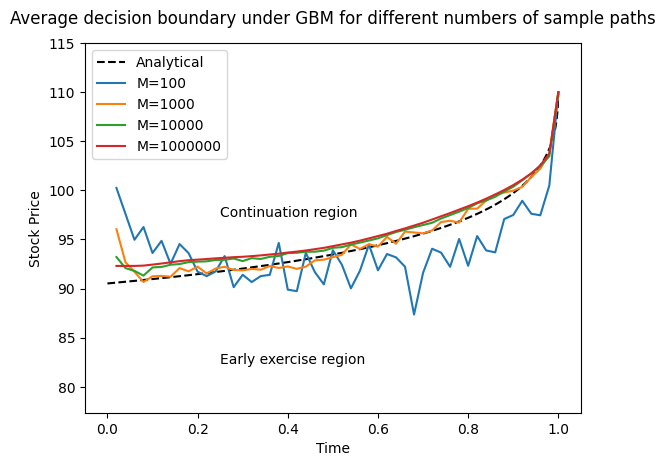

In [28]:
# Load the calculated decision boundary approximations
dec_bdd_M_100 = np.load("../results/GBM/decision_boundary_M=100.npy")
dec_bdd_M_1000 = np.load("../results/GBM/decision_boundary_M=1000.npy")
dec_bdd_M_10000 = np.load("../results/GBM/decision_boundary_M=10000.npy")
dec_bdd_M_1000000 = np.load("../results/GBM/decision_boundary_M=1000000.npy")

# Plot the analytical decision boundary and save its handle
plt.plot(np.linspace(0, T, 1001), analytical_decision_boundary, color='black', linestyle='--',label='Analytical')

# Plot the approximated decision boundaries
N = 50
dt = T/N    
time_grid = np.linspace(dt, T, N)
plt.plot(time_grid, dec_bdd_M_100, label='M=100')
plt.plot(time_grid, dec_bdd_M_1000, label='M=1000')
plt.plot(time_grid, dec_bdd_M_10000, label='M=10000')
plt.plot(time_grid, dec_bdd_M_1000000, label='M=1000000')

min_boundary_M = np.min(np.concatenate([dec_bdd_M_100, dec_bdd_M_1000, dec_bdd_M_10000, dec_bdd_M_1000000]))

# Design and save the graph
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average decision boundary under GBM for different numbers of sample paths', y=1.03)
plt.text(T/4, min_boundary_M-5, "Early exercise region")
plt.text(T/4, min_boundary_M+10, "Continuation region")
plt.ylim(min_boundary_M-10, K+5)
plt.savefig("../results/plots/decision_boundary_gbm_vary_M.png", bbox_inches='tight')
plt.show()

## Vary the number of simulations L with N=252

### Generate and save the results

In [ ]:
N = 252     # Number of time steps
dt = T/N    
time_grid = np.linspace(dt, T, N)
M = 10000   # Number of sample paths

results_L = []

for L in [1, 10, 100, 500]:
    # Compute the price and the decision boundary using the average_lsmc function
    ave_price_gbm, ave_decision_boundary_gbm = average_lsmc(L, model, constants, K, M, N, dt, reg_degree, reg_poly)

    # Compute the MAE of the decision boundary approximation vs. the analytical solution
    L1_loss = compute_mean_absolute_error(analytical_decision_boundary, ave_decision_boundary_gbm)

    # Save the obtained decision boundary approximation to npy file
    np.save(f"../results/GBM/decision_boundary_L={L}_N=252.npy", ave_decision_boundary_gbm)

    # Store the price and MAE results
    results_M.append(f"The average price of this American Put option under GBM with {L} simulations is {ave_price_gbm}")
    results_M.append(f"The Mean Absolute Error for {L} simulations is {L1_loss}")

# Save the price and MAE results to txt file
with open(f"../results/GBM/outputs_vary_L_N=252.txt", "w") as f:
    for line in results_L:
        f.write(line + "\n")

### Plot the decision boundary results

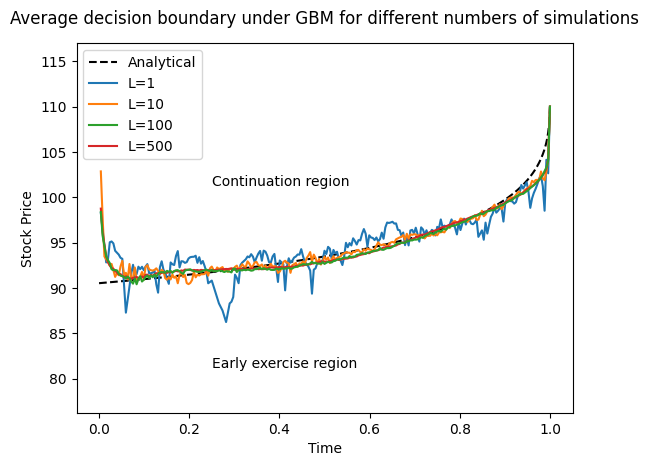

In [24]:
N = 252
dt = T/N    
time_grid = np.linspace(dt, T, N)

# Load the saved results
dec_bdd_L_1_252 = np.load("../results/GBM/decision_boundary_L=1_N=252.npy")
dec_bdd_L_10_252 = np.load("../results/GBM/decision_boundary_L=10_N=252.npy")
dec_bdd_L_100_252 = np.load("../results/GBM/decision_boundary_L=100_N=252.npy")
dec_bdd_L_500_252 = np.load("../results/GBM/decision_boundary_L=500_N=252.npy")

# Plot the analytical decision boundary and save its handle
analytical_line, = plt.plot(np.linspace(0, T, 1001), analytical_decision_boundary, color='black', linestyle='--',label='Analytical')

# Plot the approximated decision boundaries in the desired order
line1_L, = plt.plot(time_grid, dec_bdd_L_1_252, label=f'L=1')
line2_L, = plt.plot(time_grid, dec_bdd_L_10_252, label=f'L=10')
line3_L, = plt.plot(time_grid, dec_bdd_L_500_252, label=f'L=500', c='#d62728')
line4_L, = plt.plot(time_grid, dec_bdd_L_100_252, label=f'L=100', c='#2ca02c')

min_boundary_L = np.min(np.concatenate([dec_bdd_L_1_252, dec_bdd_L_10_252, dec_bdd_L_100_252, dec_bdd_L_500_252]))

lines_labels_L = [
    (1, line1_L, 'L=1'),
    (10, line2_L, 'L=10'),
    (500, line3_L, 'L=500'),
    (100, line4_L, 'L=100'),
]

# Sort legend entries by L
lines_labels_L.sort(key=lambda x: x[0])
sorted_lines_L = [item[1] for item in lines_labels_L]
sorted_labels_L = [item[2] for item in lines_labels_L]
# Insert Analytical at the top of the legend
sorted_lines_L.insert(0, analytical_line)
sorted_labels_L.insert(0, 'Analytical')

# Apply sorted legend
plt.legend(sorted_lines_L, sorted_labels_L)

# Design and save the graph
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average decision boundary under GBM for different numbers of simulations', y=1.03)
plt.text(T/4, min_boundary_L-5, "Early exercise region")
plt.text(T/4, min_boundary_L+15, "Continuation region")
plt.ylim(min_boundary_L-10, K+7)
plt.savefig("../results/plots/decision_boundary_gbm_vary_L_N=252.png", bbox_inches='tight')
plt.show()

## Vary the number of simulations L with N=50

### Generate and save the results

In [ ]:
N = 50      # Number of time steps
dt = T/N    
time_grid = np.linspace(dt, T, N)
M = 10000   # Number of sample paths

results_L = []

for L in [1, 10, 100, 500]:
    # Compute the price and the decision boundary using the average_lsmc function    
    ave_price_gbm, ave_decision_boundary_gbm = average_lsmc(L, model, constants, K, M, N, dt, reg_degree, reg_poly)
        
    # Compute the MAE of the decision boundary approximation vs. the analytical solution
    L1_loss = compute_mean_absolute_error(analytical_decision_boundary, ave_decision_boundary_gbm)

    # Save the obtained decision boundary approximation to npy file
    np.save(f"../results/GBM/decision_boundary_L={L}_N=50.npy", ave_decision_boundary_gbm)

    # Store the price and MAE results
    results_M.append(f"The average price of this American Put option under GBM with {L} simulations is {ave_price_gbm}")
    results_M.append(f"The Mean Absolute Error for {L} simulations is {L1_loss}")

# Save the price and MAE results to txt file
with open(f"../results/GBM/outputs_vary_L_N=50.txt", "w") as f:
    for line in results_L:
        f.write(line + "\n")

### Plot the decision boundary results

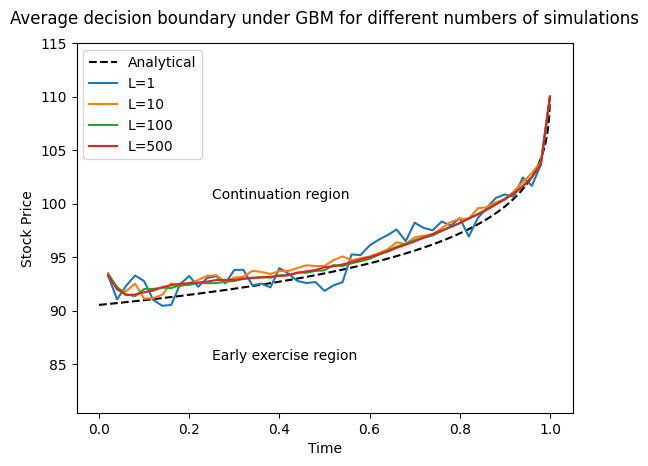

In [25]:
N = 50
dt = T/N    
time_grid = np.linspace(dt, T, N)

dec_bdd_L_1_50 = np.load("../results/GBM/decision_boundary_L=1_N=50.npy")
dec_bdd_L_10_50 = np.load("../results/GBM/decision_boundary_L=10_N=50.npy")
dec_bdd_L_100_50 = np.load("../results/GBM/decision_boundary_L=100_N=50.npy")
dec_bdd_L_500_50 = np.load("../results/GBM/decision_boundary_L=500_N=50.npy")

# Plot the analytical decision boundary and save its handle
plt.plot(np.linspace(0, T, 1001), analytical_decision_boundary, color='black', linestyle='--',label='Analytical')

# Plot the approximated decision boundaries
plt.plot(time_grid, dec_bdd_L_1_50, label=f'L=1')
plt.plot(time_grid, dec_bdd_L_10_50, label=f'L=10')
plt.plot(time_grid, dec_bdd_L_100_50, label=f'L=100')
plt.plot(time_grid, dec_bdd_L_500_50, label=f'L=500')

min_boundary_L = np.min(np.concatenate([dec_bdd_L_1_50, dec_bdd_L_10_50, dec_bdd_L_100_50, dec_bdd_L_500_50]))

# Design and save the graph
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Average decision boundary under GBM for different numbers of simulations', y=1.03)
plt.text(T/4, min_boundary_L-5, "Early exercise region")
plt.text(T/4, min_boundary_L+10, "Continuation region")
plt.ylim(min_boundary_L-10, K+5)
plt.savefig("../results/plots/decision_boundary_gbm_vary_L_N=50.png", bbox_inches='tight')
plt.show()